In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
pubg = pd.read_csv('pubg.csv')
pubg.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,f733de5bc1923d,22f5ffb5e898bf,339bdc4ad55a8b,0,0,190.70,1,0,0,22,...,0,0.0,0,0.0,0,0,210.1,3,0,0.0714
1,5906b12db725d3,b9b9079cf18b84,f7bfbfab040691,0,0,36.00,0,0,0,11,...,0,0.0,0,0.0,0,0,0.0,9,0,0.0000
2,0acb9f742d6bdb,252b5042094339,1a9121c1563ed9,0,2,55.71,0,0,1,48,...,0,0.0,0,0.0,0,0,3129.0,7,0,0.6632
3,564d2d1b64e7fa,56ec7fc9d1a80b,dd23b183d49c2a,0,4,254.10,0,0,2,6,...,0,812.4,0,0.0,0,0,2352.0,6,0,0.9368
4,e242a1ed942c6a,e8bd58872fe4e3,a7789ba61a3885,1,1,40.85,0,0,4,55,...,1,5825.0,0,0.0,0,0,1034.0,8,1493,0.5185


In [3]:
pubg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
Id                 3000 non-null object
groupId            3000 non-null object
matchId            3000 non-null object
assists            3000 non-null int64
boosts             3000 non-null int64
damageDealt        3000 non-null float64
DBNOs              3000 non-null int64
headshotKills      3000 non-null int64
heals              3000 non-null int64
killPlace          3000 non-null int64
killPoints         3000 non-null int64
kills              3000 non-null int64
killStreaks        3000 non-null int64
longestKill        3000 non-null float64
matchDuration      3000 non-null int64
matchType          3000 non-null object
maxPlace           3000 non-null int64
numGroups          3000 non-null int64
rankPoints         3000 non-null int64
revives            3000 non-null int64
rideDistance       3000 non-null float64
roadKills          3000 non-null int64
swimDistance       3000 n

# 1.0 General information 

In [4]:
pubg.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.237667,1.157000,130.292323,0.651000,0.223667,1.457667,47.156000,502.369333,0.914667,0.542333,...,0.173333,624.073450,0.004333,4.449303,0.029667,0.010667,1195.740366,3.687333,609.469000,0.484567
std,0.580770,1.763156,166.160843,1.094958,0.595336,2.813097,27.015766,622.900224,1.499156,0.702642,...,0.466220,1503.409721,0.079477,32.940002,0.200333,0.109042,1194.059048,2.321502,741.744232,0.306586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,172.675000,2.000000,0.000000,0.214300
50%,0.000000,0.000000,83.790000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,777.100000,3.000000,0.000000,0.481500
75%,0.000000,2.000000,186.025000,1.000000,0.000000,2.000000,70.000000,1158.000000,1.000000,1.000000,...,0.000000,189.725000,0.000000,0.000000,0.000000,0.000000,2033.250000,5.000000,1497.000000,0.755100
max,6.000000,12.000000,1267.000000,10.000000,8.000000,36.000000,100.000000,1918.000000,13.000000,4.000000,...,4.000000,11960.000000,3.000000,913.000000,4.000000,2.000000,11020.000000,23.000000,1819.000000,1.000000


Out of our sample size of 3000, the number of kills a player gets on average is 0.914667.

As we have said before, getting even just a single kill is difficult in pubg.
Another interesting observation is the standard deviation of kills. The standard deviation is almost 1.5 which is higher than the average. This shows that the kills vary wildly in PUBG and shows the skill curve the game has. To inspect this further, let's look at the histogram.

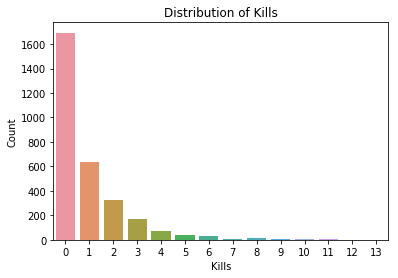

In [5]:
sns.countplot(pubg['kills'])
plt.title('Distribution of Kills')
plt.ylabel('Count')
plt.xlabel('Kills')
plt.show()

The distribution of kills shows the relative difficulty of getting a kill. More that half the players did not obtain a single kill in their respective match.

Now lets inspect the damage dealt variable to see if more people at least a single point of damage than people who did not get a single kill.

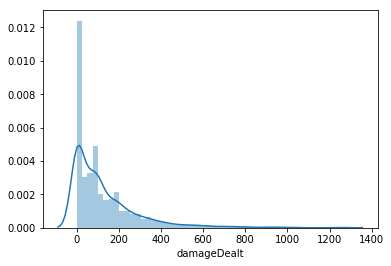

In [6]:
sns.distplot(pubg['damageDealt'])
plt.show()

The distribution shows that there are a similar amount of people who do not deal a single point of damage.

# 2.0 Guiding Question: What makes a good player? Kills or Win Place Percentage

Though the kaggle competition calls for a prediction of win place percentage, we question whether win placement is the best indicator for a skilled player. A skilled player would definitely reach the top 15 more often than an unskilled plyaer but you do not necessarily have to be "skilled" to reach the top 10 since a player could hide and avoid combat. But then how exactly would we define a "skilled" player? Though there is not one definition, we will define it as a player who can achieve the most kills in the match since we believe that killing provides a more objective analysis of a player who is capable of excelling at all aspects of the game.

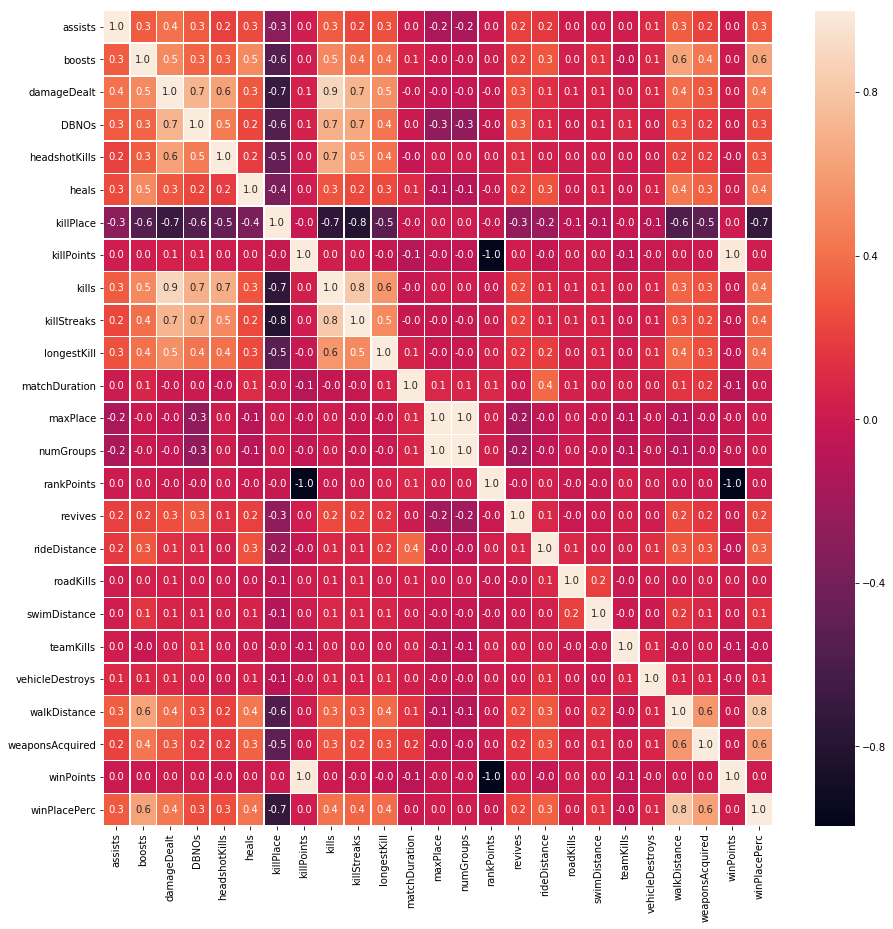

In [7]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(pubg.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

But instead of observing the kills variable, we want to observe the killPlace variable since the many variables seem to be correlated with killPlace instead of kills, possibly due to the skewnessof the kills distribution.

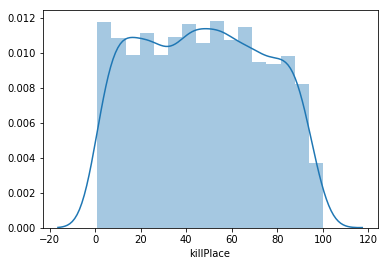

In [8]:
sns.distplot(pubg.killPlace)

A distribution that looks uniform would make sense since, there are around a 100 players that load into the match and player has one kill placement per match.

In [9]:
solo = pubg[(pubg.matchType == 'solo') | (pubg.matchType == 'solo-fpp')]
duo = pubg[(pubg.matchType == 'duo') | (pubg.matchType == 'duo-fpp')]
squad = pubg[(pubg.matchType == 'squad') | (pubg.matchType == 'squad-fpp')]

## 2.1 Killplacement and damage dealt

We will first observe the relationship of damage dealt with kill placement since it is the most obvious variable that would have a relationship with kill placement.

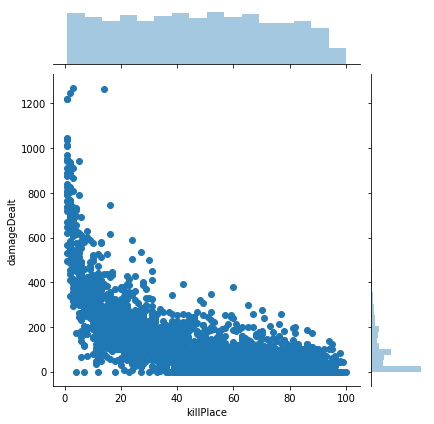

In [10]:
sns.jointplot('killPlace', 'damageDealt', data = pubg)

Observing the plot, there is an apparent relationship with the two variables. As a player deals more damage, there is a higher propensity for him to place higher with kill ranks. Though it is not a linear relationship.

## 2.2 Kill placement and boosts

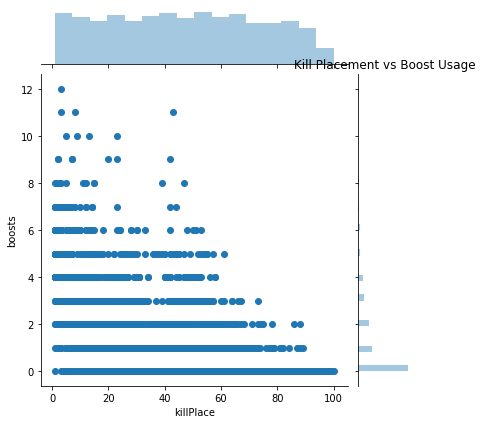

In [11]:
sns.jointplot('killPlace','boosts',data = pubg)
plt.title('Kill Placement vs Boost Usage')
plt.show()

The graph shows that the more boosts a player uses, the higher probability the player will rank higher in kills.
Though this may be an obvious relationship because the longer someone lives the more boosts they will use and therefore get more kills, experienced players intelligently use their boosts right before engagement to obtain the benefits it gives rather than using boosts just for healing. 

## 2.3 Kill placement and kill streaks

Another interesting variable to look into is kill streak. It is intersting to see because it is more highly correlated with kill placement than kills. One reason why kill placement might not be a good indication of skill is because in the beginning of the game, when everyone does not have a weapon in a populated area and one person obtains one, he can end up wiping out everyone in his vicinity causing him to get more kills. This can skew the number of kills a player gets. Though it can be argued that a player who is able to do this is a skilled player since he has the awareness and experience to quickly obtain a weapon and take over the area.

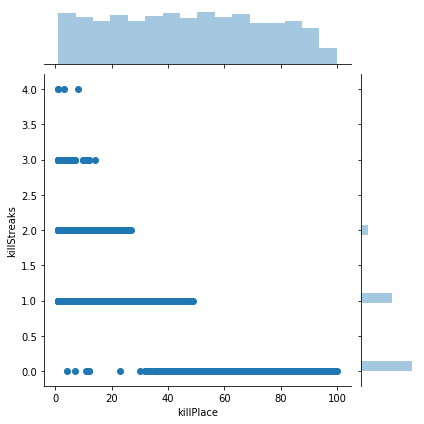

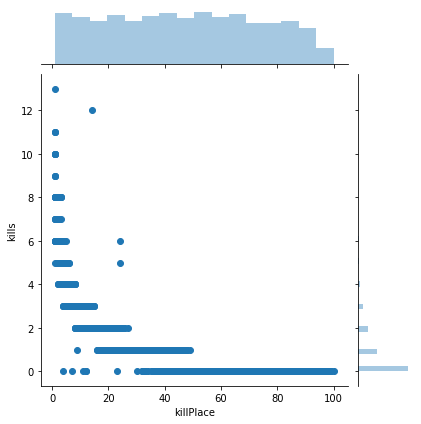

In [12]:
sns.jointplot('killPlace','killStreaks', data = pubg)

sns.jointplot('killPlace','kills', data=pubg)
plt.show()

They both show a similar trend.

## 2.6 Kill placement and walking distance

Aside from the other obvious correlations with kill streak, walking distance also correlates with killstreaks for some odd reason. Walking distance also correlates with win percentage and kills which makes sense since generally, walking more means you're alive longer and able to get more kills. More experienced players also walk and move positions more often than unexperienced players since constantly changing positions makes it so you're harder to track and obtain safer positions.

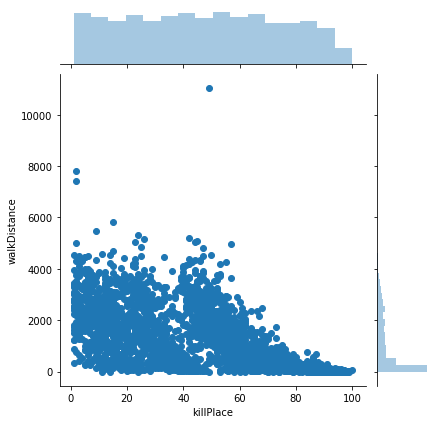

In [13]:
sns.jointplot('killPlace', 'walkDistance', data = pubg)
plt.show()

It is difficult to see a relationship between distanced walked and kill placement but there is another interesting observation. There seems to be three clusters in the plot.

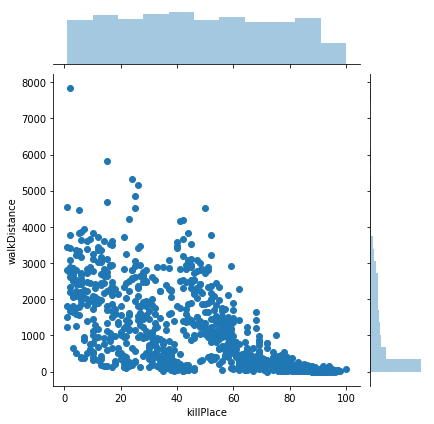

In [14]:
sns.jointplot('killPlace', 'walkDistance', data = duo)
plt.show()

Though the clusters are difficult to see, it is a little easier to observe when we focus on the players who played duo matches.

## 2.5 Kill placement and Win place percentage

We now want to see the relationship between kill placement and win place percentage since kill placement is the highest correlated variable with win percentage.

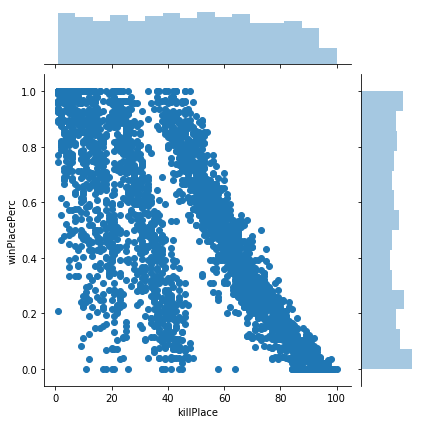

In [15]:
sns.jointplot('killPlace', 'winPlacePerc', data = pubg)

We see the three different clusters again in this plot. We are not sure what causes these clusters since there are no categorical variables aside from the match type. Our intuition says that it may be three different types of players looking at the plot. 

The right most cluster are those who place the worst in kills, and these players may get lucky once in awhile and get first place but they do not obtain many kills.

The middle cluster are players who are experienced at the game but do not excel. They place in the middle of kill rank and and win more a similar amount to those in the right cluster.

The left most cluster are those who excel at the game and get the most kills and have the highest win percentage.

## 2.6 Other inferences from Win percentage

There are some observations that can not be seen by only look at kill placement. The plot below shows the different point plots of solo, duo and squad match type.

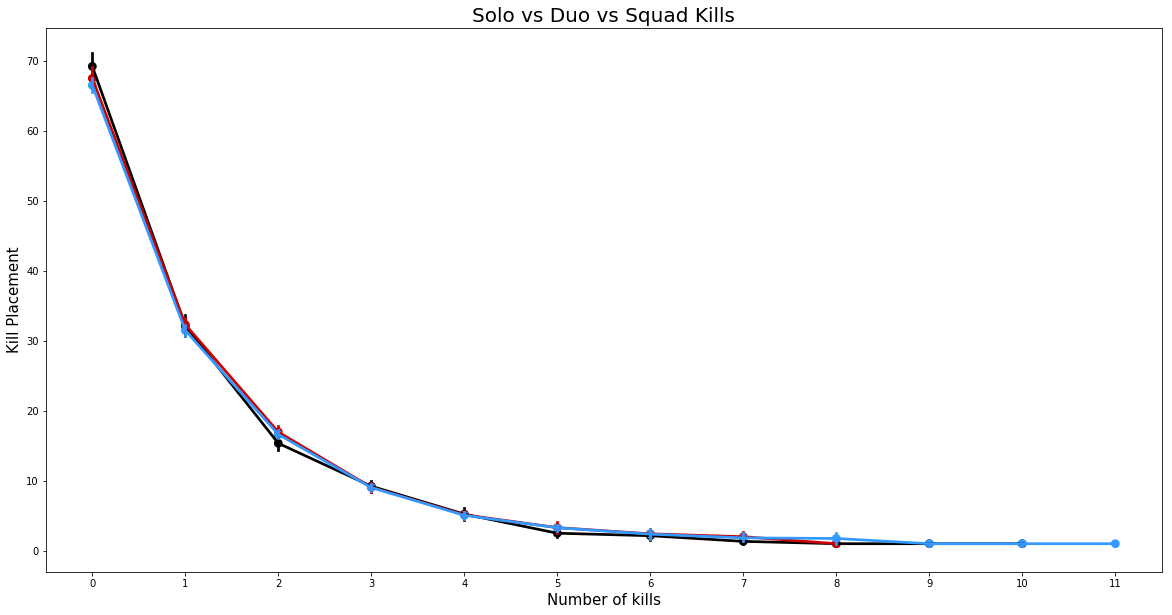

In [16]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='killPlace',data=solo,color='black',alpha=0.8)
sns.pointplot(x='kills',y='killPlace',data=duo,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='killPlace',data=squad,color='#3399FF',alpha=0.8)
plt.xlabel('Number of kills',fontsize = 15)
plt.ylabel('Kill Placement',fontsize = 15)
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20)
plt.show()

Looking at the plot there we do not observe any difference.

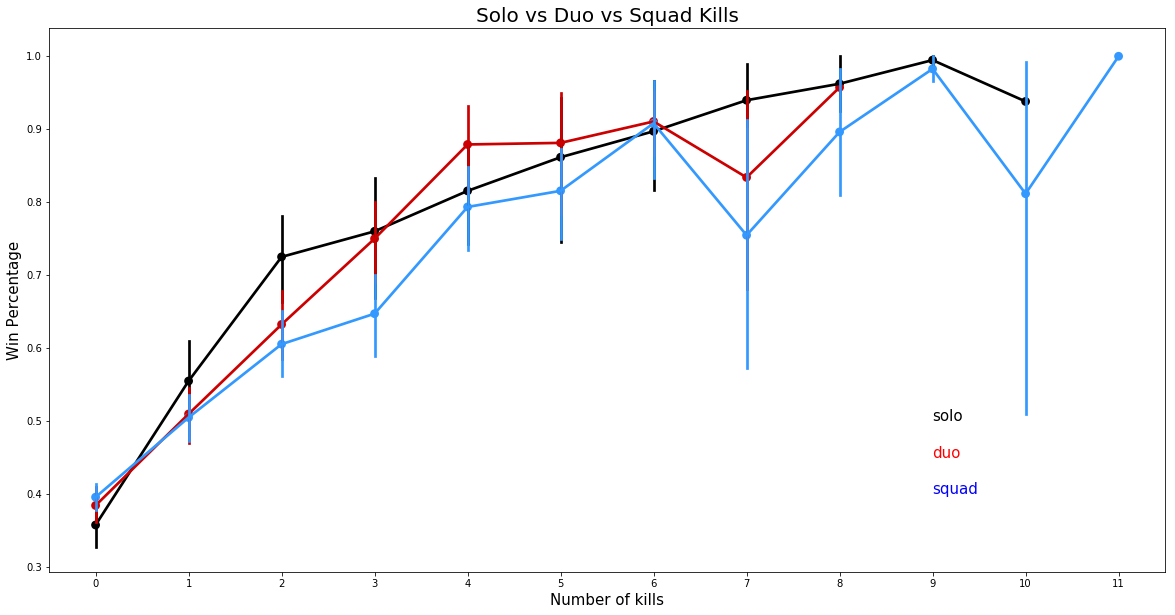

In [17]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solo,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duo,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squad,color='#3399FF',alpha=0.8)
plt.xlabel('Number of kills',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.text(9,0.5,'solo', fontsize = 15)
plt.text(9,0.45,'duo', fontsize = 15, color = 'red')
plt.text(9,0.4,'squad', fontsize = 15, color = 'blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20)
plt.show()

This plot shows the relationship of number of kills with win percentage according to match type.
Solo is the only consistent line whle the lines for duo and squad fluctuate. Though the plot shows that kills has a similar importance for win percentage with solo and duo match types while in squads, kills mean a little less. This makes sense since there are most likely three or four people in the squad so getting kills for the indivdual player may be less important.

## 3.0 Modelling 

### Splitting the data into train and test 

In [18]:
X = pubg.drop(['Id','groupId', 'matchId', 'killPlace'], axis=1)
y = pubg.loc[:,'killPlace']
xtrain, xtest, ytrain, ytest  = train_test_split(X,y,test_size = 0.3, random_state = 0)

### Scaling the data

In [19]:
xtrain_num = xtrain.drop('matchType', axis=1)
xtrain_cat = xtrain.loc[:,'matchType']
xtest_num = xtest.drop('matchType', axis=1)
xtest_cat = xtest.loc[:,'matchType']
names = list(xtrain_num)

scaler = StandardScaler()
xtrain_num = scaler.fit_transform(xtrain_num)
xtest_num = scaler.transform(xtest_num)

In [20]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(xtrain_num, ytrain)  
y_pred = regressor.predict(xtest_num)

In [29]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))  

Mean Absolute Error: 2.948233333333333
Mean Squared Error: 19.285242333333333
Root Mean Squared Error: 4.391496593797305


After running the random forest on the numerical predictors with 20 trees, we get a RMSE of 4.39.

In [22]:
xtrain_num = xtrain.drop('matchType', axis=1)
xtrain_cat = xtrain.loc[:,'matchType']
xtest_num = xtest.drop('matchType', axis=1)
xtest_cat = xtest.loc[:,'matchType']
type(xtest_num)

pandas.core.frame.DataFrame

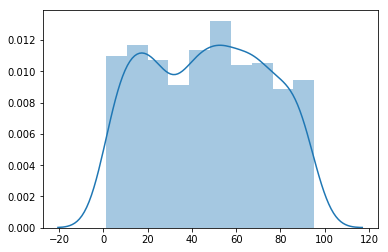

In [23]:
sns.distplot(y_pred)

The distribution of predictions looks similar to the original distribution of kill placement which looks uniform.

We can now inspect what the best number of trees is to reduce the RMSE.

In [25]:
RMSE = []
for i in np.arange(25,225,25):
    regressor = RandomForestRegressor(n_estimators=i, random_state=0)  
    regressor.fit(xtrain_num, ytrain)  
    y_pred = regressor.predict(xtest_num)
    RMSE.append(np.sqrt(metrics.mean_squared_error(ytest, y_pred)))

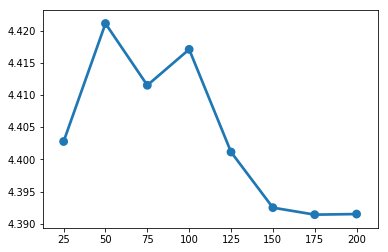

In [27]:
sns.pointplot(np.arange(25,225,25), RMSE)

We can see that up to 150 trees there is improvement in the RMSE but afterwards, there is minimal improvement.

In [30]:
regressor = RandomForestRegressor(n_estimators=150, random_state=0)  
regressor.fit(xtrain_num, ytrain)  
y_pred = regressor.predict(xtest_num)

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_pred)))  

Mean Absolute Error: 2.954037037037037
Mean Squared Error: 19.293982469135806
Root Mean Squared Error: 4.392491601487225


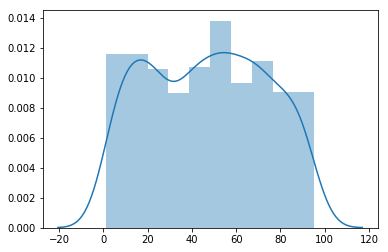

In [31]:
sns.distplot(y_pred)